# ODE
## Linear ODE

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
import matplotlib.pyplot as plt
import numpy as np

In this notebook we study linear ODE, i.e. ordinary differential equations of the form:
$$
\begin{cases}
    \sum_{i=0}^8 k_i(t)y^{(i)}+k(t)=0\\
    y(a) = y_0
\end{cases}$$

in particular we implement linear ODE up to the eight derivative. In the next few line we focus our attention on how to solve the following problem, which is a well know problem with solution $y(t) = e^t$:
$$
\begin{cases}
    y'(t)=y(t)\\
    y(0) = 1
\end{cases}$$

In [2]:
DiffEq = LinearODE(1);
DiffEq.setDomain(0,2)
DiffEq

ODE of 1-th order defined on the interval (0.000000,2.000000)

In [3]:
# a(t)u'+b(t)u+c(t)=0
# u'-u=0
DiffEq.setCoeff(0,lambda t : 0)
DiffEq.setCoeff(1,lambda t : -1)
DiffEq.setIC(1.0)

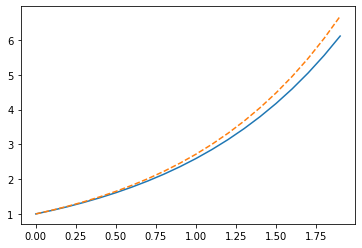

In [4]:
[H,u] = DiffEq.Euler(0.1)
plt.plot(H,u)
plt.plot(H,np.exp(H),"--")

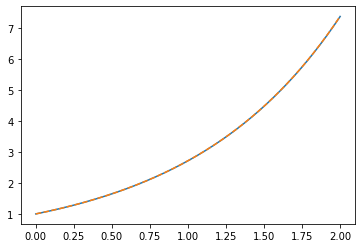

In [5]:
[H,u] = DiffEq.Euler(0.001)
plt.plot(H,u)
plt.plot(H,np.exp(H),"--")

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,2.0)
DiffEq

ODE of 1-th order defined on the interval (0.000000,2.000000)

In [14]:
I = line(-1.0,1.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.25)

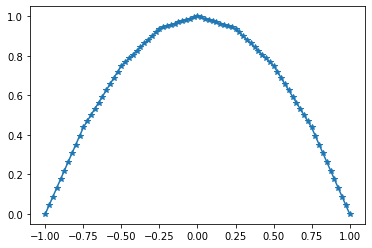

In [15]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda P: [(-P[0]**2+1)])
u0_vec = u0.vec_export()
Draw(u0,mesh,1)

In [16]:
bc = BoundaryCondition("DIRICHLET",u0)
FD = FiniteDifference(mesh)
K = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
M = spmat(K.Width(),K.Height())
K

[0,(1,1)]->1.000000
[9,(2,1)]->16.000000
[10,(2,2)]->-32.000000
[11,(2,3)]->16.000000
[19,(3,2)]->16.000000
[20,(3,3)]->-32.000000
[21,(3,4)]->16.000000
[29,(4,3)]->16.000000
[30,(4,4)]->-32.000000
[31,(4,5)]->16.000000
[39,(5,4)]->16.000000
[40,(5,5)]->-32.000000
[41,(5,6)]->16.000000
[49,(6,5)]->16.000000
[50,(6,6)]->-32.000000
[51,(6,7)]->16.000000
[59,(7,6)]->16.000000
[60,(7,7)]->-32.000000
[61,(7,8)]->16.000000
[69,(8,7)]->16.000000
[70,(8,8)]->-32.000000
[71,(8,9)]->16.000000
[80,(9,9)]->1.000000

In [17]:
DiffEq.setCoeff(0,lambda t : K)
DiffEq.setCoeff(1,lambda t : M)
DiffEq.setIC(u0_vec)
u0_vec

(0.000000,0.437500,0.750000,0.937500,1.000000,0.937500,0.750000,0.437500,0.000000)

In [18]:
K*u0_vec

(0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000)

In [19]:
[H, u] = DiffEq.Euler(0.01)

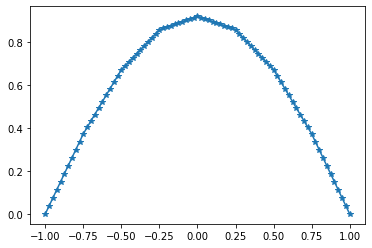

In [23]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[4])
Draw(ut,mesh,1)

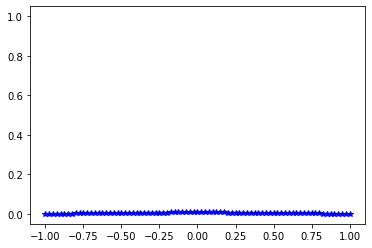

In [26]:
fig = plt.figure()
ims = []
for i in range(len(H)):
    ut.vec_import(u[i])
    ims.append(Figure(ut,mesh,1,"b*-"))

anim = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=1000)
HTML(anim.to_html5_video())